<a href="https://colab.research.google.com/github/atomicsyed-99/atomicsyed/blob/master/Major_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MAJOR PROJECT

> The primary goal of the project is to perform data cleaning, exploratory data analysis, using different Machine Learning Algorithms, solving problems 

## Table Of Contents

- Introduction
- Data Wrangling
- Solving Problems
- Comparing Accuracy
- Conclusion

## Introduction

### Dataset

- The Twitter dataset is provided for solving the problems. Gender feature is the target variable and we need to predict it. This data set contains information about 20,500 tweets collected from twitter.

> #### Contains
- Total Rows = 20500
- Total Columns = 26
- After Seeing the dataset we can say that some columns contains null values

### Questions

> 1. What are the most common emotions/words used by Males and Females?
 >2.how well do stylistic factors (like link color and sidebar color) predict user gender?
 >3. Which gender makes more typos in their tweets?
 >4. Algorithms Accuracy Calculation 

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# we'll want this for plotting
import matplotlib.pyplot as plt
import seaborn as sns

# we'll want this for text manipulation
import re

# the Naive Bayes model
from sklearn.naive_bayes import MultinomialNB
# function to split the data for cross-validation
from sklearn.model_selection import train_test_split
# function for transforming documents into counts
from sklearn.feature_extraction.text import CountVectorizer 
# function for encoding categories
from sklearn.preprocessing import LabelEncoder

## Data Wrangling

> After Observing the dataset and the questions related to this dataset for the analysis we will be keeping only relevent data and deleting the unused data

### General Properties

In [ ]:
df = pd.read_csv('Information.csv',encoding='latin1')# reading the dataset using pandas
df.head()# checking the first 5 rows of the dataset

,_unit_id,_golden,_unit_state,_trusted_judgments,_last_judgment_at,gender,gender:confidence,profile_yn,profile_yn:confidence,created,...,profileimage,retweet_count,sidebar_color,text,tweet_coord,tweet_count,tweet_created,tweet_id,tweet_location,user_timezone
0,815719226,False,finalized,3,10/26/15 23:24,male,1.0000,yes,1.0,12/5/13 1:48,...,https://pbs.twimg.com/profile_images/414342229...,0,FFFFFF,Robbie E Responds To Critics After Win Against...,NaN,110964,10/26/15 12:40,6.587300e+17,main; @Kan1shk3,Chennai
1,815719227,False,finalized,3,10/26/15 23:30,male,1.0000,yes,1.0,10/1/12 13:51,...,https://pbs.twimg.com/profile_images/539604221...,0,C0DEED,ÛÏIt felt like they were my friends and I was...,NaN,7471,10/26/15 12:40,6.587300e+17,NaN,Eastern Time (US & Canada)
2,815719228,False,finalized,3,10/26/15 23:33,male,0.6625,yes,1.0,11/28/14 11:30,...,https://pbs.twimg.com/profile_images/657330418...,1,C0DEED,i absolutely adore when louis starts the songs...,NaN,5617,10/26/15 12:40,6.587300e+17,clcncl,Belgrade
3,815719229,False,finalized,3,10/26/15 23:10,male,1.0000,yes,1.0,6/11/09 22:39,...,https://pbs.twimg.com/profile_images/259703936...,0,C0DEED,Hi @JordanSpieth - Looking at the url - do you...,NaN,1693,10/26/15 12:40,6.587300e+17,"Palo Alto, CA",Pacific Time (US & Canada)
4,815719230,False,finalized,3,10/27/15 1:15,female,1.0000,yes,1.0,4/16/14 13:23,...,https://pbs.twimg.com/profile_images/564094871...,0,0,Watching Neighbours on Sky+ catching up with t...,NaN,31462,10/26/15 12:40,6.587300e+17,NaN,NaN


In [ ]:
df.info()# checking information regarding the dataset (number of null values)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20050 entries, 0 to 20049
Data columns (total 26 columns):
_unit_id                 20050 non-null int64
_golden                  20050 non-null bool
_unit_state              20050 non-null object
_trusted_judgments       20050 non-null int64
_last_judgment_at        20000 non-null object
gender                   19953 non-null object
gender:confidence        20024 non-null float64
profile_yn               20050 non-null object
profile_yn:confidence    20050 non-null float64
created                  20050 non-null object
description              16306 non-null object
fav_number               20050 non-null int64
gender_gold              50 non-null object
link_color               20050 non-null object
name                     20050 non-null object
profile_yn_gold          50 non-null object
profileimage             20050 non-null object
retweet_count            20050 non-null int64
sidebar_color            20050 non-null object
text    

In [ ]:
df = df.dropna(subset = ['gender' , 'text' ,'description']) #dropping the unrequired features
df.isna().sum()# checking the number of null values in the dataset

_unit_id                     0
_golden                      0
_unit_state                  0
_trusted_judgments           0
_last_judgment_at           44
gender                       0
gender:confidence            0
profile_yn                   0
profile_yn:confidence        0
created                      0
description                  0
fav_number                   0
gender_gold              16180
link_color                   0
name                         0
profile_yn_gold          16180
profileimage                 0
retweet_count                0
sidebar_color                0
text                         0
tweet_coord              16072
tweet_count                  0
tweet_created                0
tweet_id                     0
tweet_location            4408
user_timezone             5078
dtype: int64

In [ ]:
df = df[df['gender:confidence']==1] #filtering the dataset on the basis of confidence
df = df[df['gender'] != 'unknown']# filtering the dataset on the basis of confidence

In [ ]:
def normalize_text(s):
    # just in case
    s = str(s)
    s = s.lower()
    
    # remove punctuation that is not word-internal (e.g., hyphens, apostrophes)
    s = re.sub('\s\W',' ',s)
    s = re.sub('\W\s',' ',s)
    
    # make sure we don't introduce any double spaces
    s = re.sub('\s+',' ',s)
    
    return s

In [ ]:
import nltk
nltk.download('stopwords')# importing all the stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Sainath\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
df['text_norm'] = [normalize_text(s) for s in df['text']]
df['description_norm'] = [normalize_text(s) for s in df['description']]
from nltk.corpus import stopwords
stop = set(stopwords.words('english'))
df['text_norm'] = df['text_norm'].str.lower().str.split()
df['text_norm'] = df['text_norm'].apply(lambda x : [item for item in x if item not in stop])

In [ ]:
df.shape# checking the shape

(11773, 28)

In [ ]:
df = df.drop(['gender:confidence','profile_yn:confidence'],axis=1) #dropping columns

In [ ]:
encoder = LabelEncoder()# initializing the encoder
df['gender'] = encoder.fit_transform(df['gender'])#encoding the gender values
df.drop(['_unit_id'],axis=1,inplace=True)# dropping unrequired columns

### Visualization Of Data

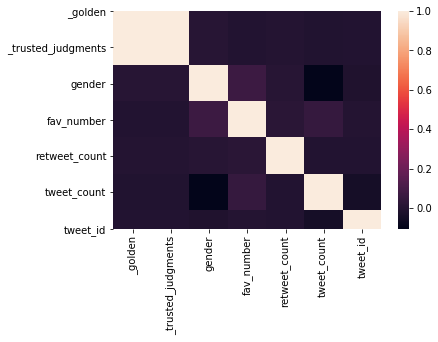

In [ ]:
corr = df.corr()# getting the correlation values
sns.heatmap(corr)# plotting the heatmap

In [ ]:
df.drop(['_golden','_unit_state','_trusted_judgments','_last_judgment_at','profile_yn'
         ,'created','fav_number','gender_gold','name','profile_yn_gold','profileimage','retweet_count'
         ,'tweet_coord','tweet_created','tweet_id','tweet_location','user_timezone','tweet_count'],axis =1,inplace = True)# dropping the unrequired columns

In [ ]:
df.head()#printing the first 5 rows

,gender,description,link_color,sidebar_color,text,text_norm,description_norm
0,2,i sing my own rhythm.,08C2C2,FFFFFF,Robbie E Responds To Critics After Win Against...,"[robbie, e, responds, critics, win, eddie, edw...",i sing my own rhythm.
1,2,I'm the author of novels filled with family dr...,0084B4,C0DEED,ÛÏIt felt like they were my friends and I was...,"[ûïit, felt, like, friends, living, story, th...",i'm the author of novels filled with family dr...
3,2,"Mobile guy. 49ers, Shazam, Google, Kleiner Pe...",0084B4,C0DEED,Hi @JordanSpieth - Looking at the url - do you...,"[hi, jordanspieth, looking, url, use, ifttt?, ...",mobile guy 49ers shazam google kleiner perkins...
4,1,Ricky Wilson The Best FRONTMAN/Kaiser Chiefs T...,3B94D9,0,Watching Neighbours on Sky+ catching up with t...,"[watching, neighbours, sky, catching, neighbs!...",ricky wilson the best frontman/kaiser chiefs t...
5,1,you don't know me.,F5ABB5,0,"Ive seen people on the train with lamps, chair...","[ive, seen, people, train, lamps, chairs, tvs,...",you don't know me.


In [ ]:
df.info()#printing the information

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11773 entries, 0 to 20049
Data columns (total 7 columns):
gender              11773 non-null int32
description         11773 non-null object
link_color          11773 non-null object
sidebar_color       11773 non-null object
text                11773 non-null object
text_norm           11773 non-null object
description_norm    11773 non-null object
dtypes: int32(1), object(6)
memory usage: 689.8+ KB


###  Q1) What are the most common emotions/words used by Males and Females?

In [ ]:
Male = df[df['gender'] == 2]# taking only the values with male as gender
Female = df[df['gender'] == 1]#taking only the values with female as gender
Brand = df[df['gender'] == 0]#taking non-gender values
Male_Words = pd.Series(' '.join(Male['text_norm'].astype(str)).lower().split(" ")).value_counts()[:20]# printing the top words
Female_Words = pd.Series(' '.join(Female['text_norm'].astype(str)).lower().split(" ")).value_counts()[:20]# printing the top words
Brand_words = pd.Series(' '.join(Brand['text_norm'].astype(str)).lower().split(" ")).value_counts()[:10]# printing the top words

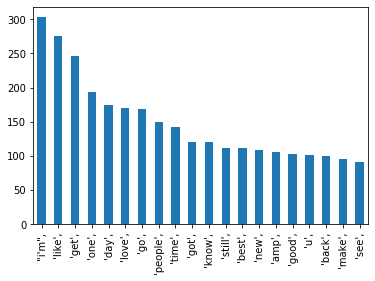

In [ ]:
Female_Words.plot(kind='bar',stacked=True)# plotting the frequency of these words

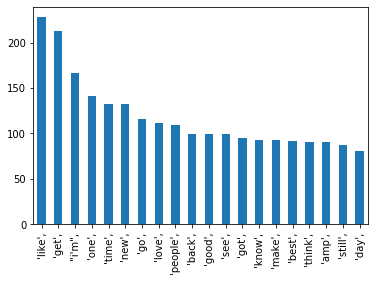

In [ ]:
Male_Words.plot(kind='bar',stacked=True)# printing the frequency of the top words

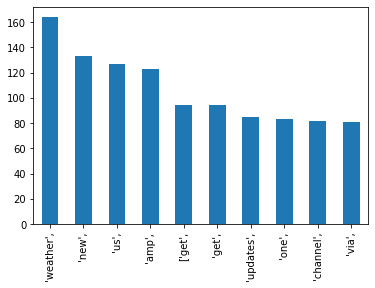

In [ ]:
Brand_words.plot(kind='bar',stacked=True)# printing the frequency of these words

### Q2) how well do stylistic factors (like link color and sidebar color) predict user gender?

In [ ]:
df.isna().sum()# checking the number of null values

gender              0
description         0
link_color          0
sidebar_color       0
text                0
text_norm           0
description_norm    0
dtype: int64

In [ ]:
df.link_color.value_counts(),df.sidebar_color.value_counts()# checking the number of unique values

(0084B4    4945
 9999       428
 3B94D9     412
 DD2E44     308
 9266CC     299
           ... 
 FC7777       1
 C25D5D       1
 2E90D1       1
 C92F14       1
 629EB8       1
 Name: link_color, Length: 2190, dtype: int64, C0DEED    4332
 FFFFFF    2621
 0         2555
 EEEEEE     502
 181A1E     222
           ... 
 186C90       1
 FCD3BB       1
 69E2E8       1
 0F0E0F       1
 191A18       1
 Name: sidebar_color, Length: 453, dtype: int64)

### Making a sparse matrix 

In [ ]:
vectorizer = CountVectorizer()
x = vectorizer.fit_transform(df['sidebar_color'],df['link_color'])# generating sparse matrix for the two columns

In [ ]:
y=df['gender']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y,test_size=0.2,)# splitting into training and testing data

In [ ]:
nb = MultinomialNB()# choosing the Naive Bayes Classifier

In [ ]:
nb.fit(x_train,y_train)# training the classifier

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [ ]:
nb_accuracy = nb.score(x_test,y_test)# checking the accuracy of the classifier
nb_accuracy

0.4326963906581741

In [ ]:
df.drop(['sidebar_color','link_color'],axis=1,inplace=True)# dropping the two columns

In [ ]:
df.head()

,gender,description,text,text_norm,description_norm
0,2,i sing my own rhythm.,Robbie E Responds To Critics After Win Against...,"[robbie, e, responds, critics, win, eddie, edw...",i sing my own rhythm.
1,2,I'm the author of novels filled with family dr...,ÛÏIt felt like they were my friends and I was...,"[ûïit, felt, like, friends, living, story, th...",i'm the author of novels filled with family dr...
3,2,"Mobile guy. 49ers, Shazam, Google, Kleiner Pe...",Hi @JordanSpieth - Looking at the url - do you...,"[hi, jordanspieth, looking, url, use, ifttt?, ...",mobile guy 49ers shazam google kleiner perkins...
4,1,Ricky Wilson The Best FRONTMAN/Kaiser Chiefs T...,Watching Neighbours on Sky+ catching up with t...,"[watching, neighbours, sky, catching, neighbs!...",ricky wilson the best frontman/kaiser chiefs t...
5,1,you don't know me.,"Ive seen people on the train with lamps, chair...","[ive, seen, people, train, lamps, chairs, tvs,...",you don't know me.


### Making a sparse matrix

In [ ]:
vectorizer = CountVectorizer()
x = vectorizer.fit_transform(df['description_norm'])# generating the sparse matrix

In [ ]:
y=df['gender']# setting the dependent variable

In [ ]:
vectorizer.get_feature_names()# getting the feature names

['00',
 '000',
 '0040',
 '0054',
 '007',
 '00am',
 '00ft3tzexg',
 '00pm',
 '01',
 '01234',
 '01276501777',
 '013',
 '01302',
 '013zukotru',
 '01484',
 '01606',
 '0161',
 '01653',
 '01701',
 '01703',
 '01704',
 '0174',
 '01743',
 '01756',
 '01772',
 '01784',
 '01803',
 '01853',
 '01904',
 '0191',
 '01912843723',
 '02',
 '020',
 '0207',
 '02093',
 '02112',
 '02122',
 '02127',
 '02131',
 '03',
 '0305',
 '032815',
 '04',
 '05',
 '06',
 '07',
 '07084303757',
 '0736330793',
 '0744',
 '07508547008',
 '07520',
 '07789',
 '07854',
 '07zwdgufny',
 '08',
 '0800',
 '080115',
 '08033368714',
 '0804',
 '08063802515',
 '0808',
 '08105794681',
 '08117576104',
 '081228801199',
 '08130633694',
 '08156207507',
 '08168100936',
 '08212254696',
 '0845',
 '0871',
 '09',
 '0903',
 '09032121871',
 '090615',
 '09102014',
 '092915',
 '0atumvgiay',
 '0ay1mmvxvz',
 '0bmedgkmm0',
 '0c2pvyoclv',
 '0do7yneqck',
 '0f',
 '0h0dtj6kl8',
 '0hw0alqpwg',
 '0ilh1tsnzu',
 '0n1k6',
 '0qulhwipla',
 '0s63a5hxso',
 '0taph4kugi',


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y,test_size=0.2,)

### Naive Baye's

In [ ]:
nb = MultinomialNB()

In [ ]:
nb.fit(x_train,y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [ ]:
nb_accuracy = nb.score(x_test,y_test)
nb_accuracy

0.6836518046709129

### Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
lg  = LogisticRegression()

In [ ]:
lg.fit(x_train,y_train)

C:\Users\Sainath\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Sainath\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
lr_predicted = lg.predict(x_test)

In [ ]:
from sklearn.metrics import accuracy_score
lr_accuracy = accuracy_score(y_test,lr_predicted)
lr_accuracy

0.6760084925690021

### Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf = RandomForestClassifier()

In [ ]:
rf.fit(x_train,y_train)

C:\Users\Sainath\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
rf_accuracy = rf.score(x_test,y_test)
rf_accuracy

0.5966029723991507

### Ensemble Learning

In [ ]:
from sklearn.ensemble import VotingClassifier

In [ ]:
model = VotingClassifier(estimators=[('nb', nb), ('lr', lg), ('rf' , rf)], voting='hard')# generating the majority vote count 

In [ ]:
model.fit(x_train,y_train)

C:\Users\Sainath\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Sainath\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


VotingClassifier(estimators=[('nb',
                              MultinomialNB(alpha=1.0, class_prior=None,
                                            fit_prior=True)),
                             ('lr',
                              LogisticRegression(C=1.0, class_weight=None,
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=100,
                                                 multi_class='warn',
                                                 n_jobs=None, penalty='l2',
                                                 random_state=None,
                                                 solver='warn', tol=0.0001,
                                                 verbose=0, warm_start=False)),
                             ('rf',
                              RandomFor...
                                         

In [ ]:
model.score(x_test,y_test)

0.6857749469214437

In [ ]:
results = pd.Series([lr_accuracy, nb_accuracy , rf_accuracy],
                    index = ["logit", "naiveb", "randomf"])

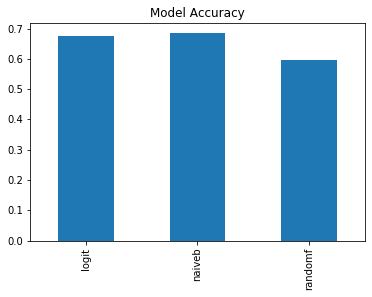

In [ ]:
results.plot(kind = 'bar' ,title = 'Model Accuracy')

## Conclusion

> First We cleaned the data, then dropped all the null values from the dataset. We have considered only those rows whose gender confidence is one, then we dropped the rows where gender is unknown and dropped the unused data. We have defined functions for removing punctuations from text and description using a regular expression. We remove the stop words from the dataset. We have performed many tasks and got the solutions for the questions asked. Then we compared the three machine learning algorithms and found the algorithm with maximum accuracy to be the Naive Bayes Algorithm . 

> This project helped us to learn more about ensemble learning and different machine learning algorithms. It also helped in exploring Natural Language Processing. It helped us understand the  use of NumPy, panda, Sckit learning, and various other python libraries . 

## Submitted By:

- #### Name : Syed Ishtiyaq Ahmed
- #### E-Mail : syedishahmed99@gmail.com
- #### College : Amrita School Of Engineering , Amrita Vishwa Vidyapeetham , Coimbatore
- #### Classroom- Id : ML052B6

## Thank You